##### Import our dependencies

In [20]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

##### import the input dataset

In [21]:
#  Import and read the charity_data.csv.

application_df = pd.read_csv("./Data/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [22]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df=application_df.drop(["EIN"], axis =1)

##### Determine the number of unique values in each column

In [23]:
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [24]:
# Look at APPLICATION_TYPE value counts for binning
application_counts=application_df["APPLICATION_TYPE"].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

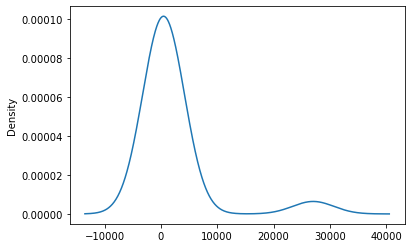

In [25]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [26]:
# Determine which values to replace if counts are less than ...? less than 500
replace_appliaction = list(application_counts[application_counts<500].index)

# Replace in dataframe
for app in replace_appliaction:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [27]:
# Look at CLASSIFICATION value counts for binning
class_counts =application_df["CLASSIFICATION"].value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [28]:
# Determine which values to replace if counts are less than 1000..?
replace_class = list(class_counts[class_counts<1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [29]:
application_df.nunique()

NAME                      19568
APPLICATION_TYPE              9
AFFILIATION                   6
CLASSIFICATION                6
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [30]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NAME                    34299 non-null  object
 1   APPLICATION_TYPE        34299 non-null  object
 2   AFFILIATION             34299 non-null  object
 3   CLASSIFICATION          34299 non-null  object
 4   USE_CASE                34299 non-null  object
 5   ORGANIZATION            34299 non-null  object
 6   STATUS                  34299 non-null  int64 
 7   INCOME_AMT              34299 non-null  object
 8   SPECIAL_CONSIDERATIONS  34299 non-null  object
 9   ASK_AMT                 34299 non-null  int64 
 10  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.9+ MB


#### bin Names

In [31]:
name_counts = application_df["NAME"].value_counts()
name_counts

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

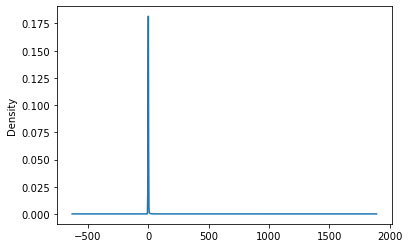

In [32]:
# Visualize the value counts of name
name_counts.plot.density()

In [33]:
# Determine which values to replace if counts are less than 1..?
replace_application = list(name_counts[name_counts<1].index)

# Replace in dataframe
for app in replace_application:
    application_df['NAME'] = application_df['NAME'].replace(app,"No Repeat")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [34]:
#USe the bucket technique to put those with 5 or less in a small bucket
# Determine which values to replace if counts are less than 5..?
replace_application = list(name_counts[name_counts<= 5 ].index)

# Replace in dataframe
for app in replace_application:
    application_df['NAME'] = application_df['NAME'].replace(app,"In Frequent")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

In Frequent                                     20043
PARENT BOOSTER USA INC                           1260
TOPS CLUB INC                                     765
UNITED STATES BOWLING CONGRESS INC                700
WASHINGTON STATE UNIVERSITY                       492
                                                ...  
HABITAT FOR HUMANITY INTERNATIONAL                  6
DAMAGE PREVENTION COUNCIL OF TEXAS                  6
FLEET RESERVE ASSOCIATION                           6
HUGH OBRIAN YOUTH LEADERSHIP                        6
INTERNATIONAL CONGRESS OF CHURCHES MINISTERS        6
Name: NAME, Length: 355, dtype: int64

In [35]:
#USe the bucket technique to put those with 100 or less in a small bucket
# Determine which values to replace if counts are less than 5..?
replace_application = list(name_counts[name_counts<= 100 ].index)

# Replace in dataframe
for app in replace_application:
    application_df['NAME'] = application_df['NAME'].replace(app,"Frequent")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

In Frequent                                                           20043
Frequent                                                               5944
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGUE BASEBALL INC                                              277
INTERNATIONA

In [36]:
#USe the bucket technique to put those with 100 or less in a small bucket
# Determine which values to replace if counts are less than 5..?
replace_application = list(name_counts[name_counts > 100 ].index)

# Replace in dataframe
for app in replace_application:
    application_df['NAME'] = application_df['NAME'].replace(app,"Habitual")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

In Frequent    20043
Habitual        8312
Frequent        5944
Name: NAME, dtype: int64

In [32]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [33]:
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

##### Create a OneHotEncoder instance

In [34]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True,right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\Helanga\AppData\Local\Temp/ipykernel_440/3710565482.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  application_df = application_df.drop(application_cat,1)


,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [36]:
application_df.shape

(34299, 41)

In [37]:
# Split our preprocessed data into our features and target arrays
# X is our feature matrix
X = application_df.drop(["IS_SUCCESSFUL"],1).values

y = application_df["IS_SUCCESSFUL"].values


# Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=78)

C:\Users\Helanga\AppData\Local\Temp/ipykernel_440/2586869407.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = application_df.drop(["IS_SUCCESSFUL"],1).values


In [38]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [39]:
#testing
len(X_train[0])

40

In [40]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 50
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()
# note from module 19.2.5 Rule of thumb:A good rule of thumb for a basic neural network
#is to have two to three times the amount of neurons in the hidden layer
# as the number of inputs

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1,input_dim=number_input_features,activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3280      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 6,671
Trainable params: 6,671
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

#Define the checkpoints path and file names
os.makedirs("Checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

##### Implement checkpint

In [42]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("Checkpoints/",exist_ok=True)
check_point_path ="checkpoints/weights.{epoch:02d}.hdf5"

In [43]:
# Compile the model
nn.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [44]:
#Create a callback that save the model's weight every epoch(set 5)

cp_callback = ModelCheckpoint(
    filepath=check_point_path,
    verbose=1,
    save_weights_only=True,
    save_freq= 5)

##### Train the model

In [45]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 6:46 - loss: 0.6867 - accuracy: 0.5000
Epoch 1: saving model to checkpoints\weights.01.hdf5
  5/804 [..............................] - ETA: 15s - loss: 0.7091 - accuracy: 0.4563 
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 20/804 [..............................] - ETA: 5s - loss: 0.6900 - accuracy: 0.5562 
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 33/804 [>.............................] - ETA: 4s - loss: 0.6801 - accuracy: 0.5938
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 45/804 [>.............................] - ETA: 4s - loss: 0.6709 - accuracy: 0.6201
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model 


Epoch 1: saving model to checkpoints\weights.01.hdf5
490/804 [=================>............] - ETA: 1s - loss: 0.5787 - accuracy: 0.7141
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.5792 - accuracy: 0.7145
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.5778 - accuracy: 0.7152
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
535/804 [==================>...........] - ETA: 1s - loss: 0.5769 - accuracy: 0.7160
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving


Epoch 2: saving model to checkpoints\weights.02.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 0.5433 - accuracy: 0.7377
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 0.5449 - accuracy: 0.7372
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 0.5486 - accuracy: 0.7340
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
226/804 [=======>......................] - ETA: 2s - loss: 0.5505 - accuracy: 0.7329
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving


Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.5562 - accuracy: 0.7305
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.5562 - accuracy: 0.7306
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.5558 - accuracy: 0.7309
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.5563 - accuracy: 0.7308
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving


Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
372/804 [============>.................] - ETA: 1s - loss: 0.5481 - accuracy: 0.7357
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
387/804 [=============>................] - ETA: 1s - loss: 0.5476 - accuracy: 0.7364
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
402/804 [==============>...............] - ETA: 1s - loss: 0.5483 - accuracy: 0.7357
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
417/804 [==============>...............] - ETA: 1s - loss: 0.5488 - accuracy: 0.7350
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving


Epoch 4: saving model to checkpoints\weights.04.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.5579 - accuracy: 0.7193
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 73/804 [=>............................] - ETA: 2s - loss: 0.5600 - accuracy: 0.7196
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 88/804 [==>...........................] - ETA: 2s - loss: 0.5589 - accuracy: 0.7191
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
103/804 [==>...........................] - ETA: 2s - loss: 0.5586 - accuracy: 0.7200
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving

239/804 [=======>......................] - ETA: 2s - loss: 0.5439 - accuracy: 0.7412
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
254/804 [========>.....................] - ETA: 1s - loss: 0.5443 - accuracy: 0.7410
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
269/804 [=========>....................] - ETA: 1s - loss: 0.5453 - accuracy: 0.7393
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
284/804 [=========>....................] - ETA: 1s - loss: 0.5461 - accuracy: 0.7382
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
299/804 [=======


Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.5478 - accuracy: 0.7357
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.5479 - accuracy: 0.7357
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.5480 - accuracy: 0.7359
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.5486 - accuracy: 0.7353
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving


Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 0.5516 - accuracy: 0.7296
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 0.5515 - accuracy: 0.7296
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
465/804 [================>.............] - ETA: 1s - loss: 0.5520 - accuracy: 0.7286
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
480/804 [================>.............] - ETA: 1s - loss: 0.5517 - accuracy: 0.7291
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving


Epoch 7: saving model to checkpoints\weights.07.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 0.5576 - accuracy: 0.7291
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 0.5541 - accuracy: 0.7312
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 0.5523 - accuracy: 0.7320
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 0.5493 - accuracy: 0.7331
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving

297/804 [==========>...................] - ETA: 1s - loss: 0.5527 - accuracy: 0.7327
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
312/804 [==========>...................] - ETA: 1s - loss: 0.5535 - accuracy: 0.7326
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
327/804 [===========>..................] - ETA: 1s - loss: 0.5531 - accuracy: 0.7330
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
342/804 [===========>..................] - ETA: 1s - loss: 0.5537 - accuracy: 0.7315
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
357/804 [=======

473/804 [================>.............] - ETA: 1s - loss: 0.5463 - accuracy: 0.7392
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
488/804 [=================>............] - ETA: 1s - loss: 0.5455 - accuracy: 0.7390
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.5452 - accuracy: 0.7382
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
518/804 [==================>...........] - ETA: 1s - loss: 0.5443 - accuracy: 0.7384
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
533/804 [=======


Epoch 10: saving model to checkpoints\weights.10.hdf5
164/804 [=====>........................] - ETA: 2s - loss: 0.5508 - accuracy: 0.7292
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.5499 - accuracy: 0.7289
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 0.5470 - accuracy: 0.7313
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 0.5491 - accuracy: 0.7307
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epo


Epoch 10: saving model to checkpoints\weights.10.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.5457 - accuracy: 0.7357
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5461 - accuracy: 0.7360
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5460 - accuracy: 0.7357
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5467 - accuracy: 0.7353
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epo


Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 0.5440 - accuracy: 0.7364
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
360/804 [============>.................] - ETA: 1s - loss: 0.5433 - accuracy: 0.7369
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
375/804 [============>.................] - ETA: 1s - loss: 0.5431 - accuracy: 0.7365
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.5431 - accuracy: 0.7365
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epo

506/804 [=================>............] - ETA: 1s - loss: 0.5441 - accuracy: 0.7362
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
521/804 [==================>...........] - ETA: 1s - loss: 0.5451 - accuracy: 0.7355
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
536/804 [===================>..........] - ETA: 0s - loss: 0.5447 - accuracy: 0.7355
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
551/804 [===================>..........] - ETA: 0s - loss: 0.5438 - accuracy: 0.7363
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
566/


Epoch 13: saving model to checkpoints\weights.13.hdf5
192/804 [======>.......................] - ETA: 2s - loss: 0.5450 - accuracy: 0.7342
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
207/804 [======>.......................] - ETA: 2s - loss: 0.5430 - accuracy: 0.7372
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
222/804 [=======>......................] - ETA: 2s - loss: 0.5434 - accuracy: 0.7379
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
237/804 [=======>......................] - ETA: 2s - loss: 0.5443 - accuracy: 0.7367
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epo


Epoch 13: saving model to checkpoints\weights.13.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.5420 - accuracy: 0.7382
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.5423 - accuracy: 0.7378
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.5427 - accuracy: 0.7377
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.5425 - accuracy: 0.7374
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epo


Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.5453 - accuracy: 0.7382
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
388/804 [=============>................] - ETA: 1s - loss: 0.5462 - accuracy: 0.7373
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
403/804 [==============>...............] - ETA: 1s - loss: 0.5452 - accuracy: 0.7371
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.5457 - accuracy: 0.7368
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epo

539/804 [===================>..........] - ETA: 0s - loss: 0.5451 - accuracy: 0.7363
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 0.5449 - accuracy: 0.7366
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 0.5453 - accuracy: 0.7365
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.5459 - accuracy: 0.7361
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
599/


Epoch 16: saving model to checkpoints\weights.16.hdf5
225/804 [=======>......................] - ETA: 2s - loss: 0.5396 - accuracy: 0.7432
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
240/804 [=======>......................] - ETA: 2s - loss: 0.5394 - accuracy: 0.7434
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
255/804 [========>.....................] - ETA: 2s - loss: 0.5375 - accuracy: 0.7455
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
270/804 [=========>....................] - ETA: 1s - loss: 0.5377 - accuracy: 0.7443
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epo


Epoch 16: saving model to checkpoints\weights.16.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5444 - accuracy: 0.7364
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.5447 - accuracy: 0.7363
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.5449 - accuracy: 0.7364
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.5443 - accuracy: 0.7367
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epo


Epoch 17: saving model to checkpoints\weights.17.hdf5
401/804 [=============>................] - ETA: 1s - loss: 0.5479 - accuracy: 0.7315
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
416/804 [==============>...............] - ETA: 1s - loss: 0.5471 - accuracy: 0.7321
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
431/804 [===============>..............] - ETA: 1s - loss: 0.5467 - accuracy: 0.7327
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
446/804 [===============>..............] - ETA: 1s - loss: 0.5462 - accuracy: 0.7331
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epo


Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 0.5292 - accuracy: 0.7428
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
102/804 [==>...........................] - ETA: 2s - loss: 0.5319 - accuracy: 0.7414
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
117/804 [===>..........................] - ETA: 2s - loss: 0.5289 - accuracy: 0.7436
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
132/804 [===>..........................] - ETA: 2s - loss: 0.5328 - accuracy: 0.7403
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epo


Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 0.5380 - accuracy: 0.7417
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 0.5382 - accuracy: 0.7415
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.5385 - accuracy: 0.7415
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.5384 - accuracy: 0.7411
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epo

748/804 [==========================>...] - ETA: 0s - loss: 0.5423 - accuracy: 0.7385
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.5425 - accuracy: 0.7383
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.5423 - accuracy: 0.7383
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.5419 - accuracy: 0.7383
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
804/804 [==============================] - 3s 4ms/step - lo


Epoch 20: saving model to checkpoints\weights.20.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.5408 - accuracy: 0.7393
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.5404 - accuracy: 0.7399
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.5409 - accuracy: 0.7394
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.5417 - accuracy: 0.7388
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epo


Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
120/804 [===>..........................] - ETA: 2s - loss: 0.5346 - accuracy: 0.7477
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
135/804 [====>.........................] - ETA: 2s - loss: 0.5327 - accuracy: 0.7505
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
150/804 [====>.........................] - ETA: 2s - loss: 0.5312 - accuracy: 0.7506
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
165/804 [=====>........................] - ETA: 2s - loss: 0.5355 - accuracy: 0.7470
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epo


Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.5432 - accuracy: 0.7383
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.5433 - accuracy: 0.7384
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.5432 - accuracy: 0.7382
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.5428 - accuracy: 0.7382
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epo


Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.5419 - accuracy: 0.7383
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5421 - accuracy: 0.7383
Epoch 23/100
  1/804 [..............................] - ETA: 1s - loss: 0.3900 - accuracy: 0.8438
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
 12/804 [..............................] - ETA: 3s - loss: 0.5154 - accuracy: 0.7422
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
 27/804 [>.............................] 


Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
467/804 [================>.............] - ETA: 1s - loss: 0.5409 - accuracy: 0.7372
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
482/804 [================>.............] - ETA: 1s - loss: 0.5397 - accuracy: 0.7386
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
497/804 [=================>............] - ETA: 1s - loss: 0.5399 - accuracy: 0.7385
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
512/804 [==================>...........] - ETA: 1s - loss: 0.5398 - accuracy: 0.7387
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epo


Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
148/804 [====>.........................] - ETA: 2s - loss: 0.5377 - accuracy: 0.7420
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
163/804 [=====>........................] - ETA: 2s - loss: 0.5349 - accuracy: 0.7435
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
178/804 [=====>........................] - ETA: 2s - loss: 0.5360 - accuracy: 0.7435
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
193/804 [======>.......................] - ETA: 2s - loss: 0.5361 - accuracy: 0.7451
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epo


Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.5433 - accuracy: 0.7366
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.5438 - accuracy: 0.7359
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.5434 - accuracy: 0.7357
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.5433 - accuracy: 0.7356
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epo

804/804 [==============================] - 3s 4ms/step - loss: 0.5411 - accuracy: 0.7395
Epoch 26/100
  1/804 [..............................] - ETA: 0s - loss: 0.4317 - accuracy: 0.8438
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.5226 - accuracy: 0.7542
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
 30/804 [>.............................] - ETA: 2s - loss: 0.5530 - accuracy: 0.7302
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
 45/804 [>.............................] - ETA: 2s - loss: 0.5374 - accuracy: 0.7417
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: s


Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.5397 - accuracy: 0.7385
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.5396 - accuracy: 0.7382
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 0.5396 - accuracy: 0.7382
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.5402 - accuracy: 0.7378
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epo


Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
176/804 [=====>........................] - ETA: 2s - loss: 0.5328 - accuracy: 0.7422
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
190/804 [======>.......................] - ETA: 2s - loss: 0.5354 - accuracy: 0.7401
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
201/804 [======>.......................] - ETA: 2s - loss: 0.5361 - accuracy: 0.7410
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
216/804 [=======>......................] - ETA: 2s - loss: 0.5360 - accuracy: 0.7420
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epo


Epoch 27: saving model to checkpoints\weights.27.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.5416 - accuracy: 0.7377
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.5415 - accuracy: 0.7375
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.5414 - accuracy: 0.7379
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.5410 - accuracy: 0.7382
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epo


Epoch 29: saving model to checkpoints\weights.29.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.5278 - accuracy: 0.7377
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
 43/804 [>.............................] - ETA: 3s - loss: 0.5253 - accuracy: 0.7435
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.5249 - accuracy: 0.7468
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
 73/804 [=>............................] - ETA: 2s - loss: 0.5316 - accuracy: 0.7432
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epo


Epoch 29: saving model to checkpoints\weights.29.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.5407 - accuracy: 0.7383
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.5410 - accuracy: 0.7382
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 0.5398 - accuracy: 0.7393
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
568/804 [====================>.........] - ETA: 0s - loss: 0.5412 - accuracy: 0.7381
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epo


Epoch 30: saving model to checkpoints\weights.30.hdf5
204/804 [======>.......................] - ETA: 2s - loss: 0.5397 - accuracy: 0.7393
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
219/804 [=======>......................] - ETA: 2s - loss: 0.5400 - accuracy: 0.7384
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
234/804 [=======>......................] - ETA: 2s - loss: 0.5407 - accuracy: 0.7386
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
249/804 [========>.....................] - ETA: 2s - loss: 0.5419 - accuracy: 0.7361
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epo


Epoch 30: saving model to checkpoints\weights.30.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.5380 - accuracy: 0.7401
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.5383 - accuracy: 0.7402
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.5377 - accuracy: 0.7406
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.5385 - accuracy: 0.7398
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epo


Epoch 32: saving model to checkpoints\weights.32.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.5243 - accuracy: 0.7423
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 0.5261 - accuracy: 0.7401
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 0.5323 - accuracy: 0.7359
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 0.5328 - accuracy: 0.7373
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epo


Epoch 32: saving model to checkpoints\weights.32.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 0.5370 - accuracy: 0.7419
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 0.5374 - accuracy: 0.7418
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.5376 - accuracy: 0.7416
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.5379 - accuracy: 0.7412
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epo


Epoch 33: saving model to checkpoints\weights.33.hdf5
237/804 [=======>......................] - ETA: 2s - loss: 0.5433 - accuracy: 0.7389
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
252/804 [========>.....................] - ETA: 2s - loss: 0.5432 - accuracy: 0.7395
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
263/804 [========>.....................] - ETA: 2s - loss: 0.5433 - accuracy: 0.7382
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
272/804 [=========>....................] - ETA: 2s - loss: 0.5424 - accuracy: 0.7385
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
287/804 [=========>....................] - ETA: 2s - loss: 

403/804 [==============>...............] - ETA: 1s - loss: 0.5416 - accuracy: 0.7357
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.5405 - accuracy: 0.7366
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
433/804 [===============>..............] - ETA: 1s - loss: 0.5409 - accuracy: 0.7353
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
448/804 [===============>..............] - ETA: 1s - loss: 0.5411 - accuracy: 0.7354
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
463/


Epoch 35: saving model to checkpoints\weights.35.hdf5
 89/804 [==>...........................] - ETA: 3s - loss: 0.5433 - accuracy: 0.7342
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
104/804 [==>...........................] - ETA: 2s - loss: 0.5399 - accuracy: 0.7398
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
119/804 [===>..........................] - ETA: 2s - loss: 0.5398 - accuracy: 0.7398
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
134/804 [====>.........................] - ETA: 2s - loss: 0.5403 - accuracy: 0.7400
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epo


Epoch 35: saving model to checkpoints\weights.35.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.5400 - accuracy: 0.7388
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.5396 - accuracy: 0.7396
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.5399 - accuracy: 0.7394
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.5407 - accuracy: 0.7386
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epo


Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
270/804 [=========>....................] - ETA: 2s - loss: 0.5338 - accuracy: 0.7439
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
285/804 [=========>....................] - ETA: 2s - loss: 0.5346 - accuracy: 0.7431
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
300/804 [==========>...................] - ETA: 2s - loss: 0.5361 - accuracy: 0.7410
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
315/804 [==========>...................] - ETA: 1s - loss: 0.5353 - accuracy: 0.7422
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epo


Epoch 36: saving model to checkpoints\weights.36.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.5408 - accuracy: 0.7387
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.5402 - accuracy: 0.7390
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.5398 - accuracy: 0.7395
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5396 - accuracy: 0.7396
Epoch 37/100

Epoch 37: saving model to checkpoints\weights.37.hdf5
  1/804 [..............................] - ETA: 16s - loss: 0.4886 - accuracy: 0.7812
Epoch 37: 

117/804 [===>..........................] - ETA: 2s - loss: 0.5292 - accuracy: 0.7489
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
132/804 [===>..........................] - ETA: 2s - loss: 0.5313 - accuracy: 0.7455
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
147/804 [====>.........................] - ETA: 2s - loss: 0.5345 - accuracy: 0.7447
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
162/804 [=====>........................] - ETA: 2s - loss: 0.5362 - accuracy: 0.7423
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
177/

612/804 [=====================>........] - ETA: 0s - loss: 0.5364 - accuracy: 0.7421
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.5367 - accuracy: 0.7421
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 0.5371 - accuracy: 0.7416
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.5369 - accuracy: 0.7415
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
672/


Epoch 39: saving model to checkpoints\weights.39.hdf5
298/804 [==========>...................] - ETA: 2s - loss: 0.5340 - accuracy: 0.7412
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
313/804 [==========>...................] - ETA: 1s - loss: 0.5322 - accuracy: 0.7432
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
328/804 [===========>..................] - ETA: 1s - loss: 0.5330 - accuracy: 0.7425
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.5311 - accuracy: 0.7441
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epo

788/804 [============================>.] - ETA: 0s - loss: 0.5394 - accuracy: 0.7398
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5393 - accuracy: 0.7398
Epoch 40/100
  1/804 [..............................] - ETA: 1s - loss: 0.4886 - accuracy: 0.7500
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.5389 - accuracy: 0.7299
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
 29/804 [>.............................] - ETA: 3s - loss: 0.5419 - accuracy: 0.7263
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: s


Epoch 40: saving model to checkpoints\weights.40.hdf5
474/804 [================>.............] - ETA: 1s - loss: 0.5394 - accuracy: 0.7377
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
489/804 [=================>............] - ETA: 1s - loss: 0.5390 - accuracy: 0.7381
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
504/804 [=================>............] - ETA: 1s - loss: 0.5389 - accuracy: 0.7382
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 0.5382 - accuracy: 0.7388
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epo


Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
160/804 [====>.........................] - ETA: 2s - loss: 0.5374 - accuracy: 0.7430
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
175/804 [=====>........................] - ETA: 2s - loss: 0.5395 - accuracy: 0.7414
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
190/804 [======>.......................] - ETA: 2s - loss: 0.5430 - accuracy: 0.7390
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
205/804 [======>.......................] - ETA: 2s - loss: 0.5449 - accuracy: 0.7369
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epo


Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.5419 - accuracy: 0.7378
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.5413 - accuracy: 0.7383
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.5417 - accuracy: 0.7377
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.5409 - accuracy: 0.7386
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epo

 12/804 [..............................] - ETA: 4s - loss: 0.5483 - accuracy: 0.7214
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.5329 - accuracy: 0.7454
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
 42/804 [>.............................] - ETA: 3s - loss: 0.5351 - accuracy: 0.7463
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
 57/804 [=>............................] - ETA: 3s - loss: 0.5421 - accuracy: 0.7407
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
 72/


Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
193/804 [======>.......................] - ETA: 2s - loss: 0.5400 - accuracy: 0.7424
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
208/804 [======>.......................] - ETA: 2s - loss: 0.5390 - accuracy: 0.7425
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
223/804 [=======>......................] - ETA: 2s - loss: 0.5388 - accuracy: 0.7422
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 0.5395 - accuracy: 0.7407
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epo


Epoch 44: saving model to checkpoints\weights.44.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.5388 - accuracy: 0.7401
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.5384 - accuracy: 0.7400
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.5387 - accuracy: 0.7399
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.5388 - accuracy: 0.7398
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epo


Epoch 46: saving model to checkpoints\weights.46.hdf5
 45/804 [>.............................] - ETA: 3s - loss: 0.5225 - accuracy: 0.7542
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
 60/804 [=>............................] - ETA: 3s - loss: 0.5318 - accuracy: 0.7469
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
 75/804 [=>............................] - ETA: 2s - loss: 0.5382 - accuracy: 0.7417
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
 90/804 [==>...........................] - ETA: 2s - loss: 0.5412 - accuracy: 0.7351
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epo


Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
540/804 [===================>..........] - ETA: 1s - loss: 0.5399 - accuracy: 0.7395
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
555/804 [===================>..........] - ETA: 1s - loss: 0.5406 - accuracy: 0.7387
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 0.5400 - accuracy: 0.7391
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
585/804 [====================>.........] - ETA: 0s - loss: 0.5391 - accuracy: 0.7398
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epo

706/804 [=========================>....] - ETA: 0s - loss: 0.5393 - accuracy: 0.7392
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.5389 - accuracy: 0.7393
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.5391 - accuracy: 0.7396
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.5397 - accuracy: 0.7390
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.5399 - accuracy: 0.7389
Epoch 47: saving model to che

387/804 [=============>................] - ETA: 1s - loss: 0.5318 - accuracy: 0.7460
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
402/804 [==============>...............] - ETA: 1s - loss: 0.5324 - accuracy: 0.7458
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
417/804 [==============>...............] - ETA: 1s - loss: 0.5326 - accuracy: 0.7453
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
432/804 [===============>..............] - ETA: 1s - loss: 0.5333 - accuracy: 0.7443
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
447/


Epoch 49: saving model to checkpoints\weights.49.hdf5
 73/804 [=>............................] - ETA: 3s - loss: 0.5295 - accuracy: 0.7389
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
 88/804 [==>...........................] - ETA: 2s - loss: 0.5281 - accuracy: 0.7429
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
103/804 [==>...........................] - ETA: 2s - loss: 0.5251 - accuracy: 0.7461
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
118/804 [===>..........................] - ETA: 2s - loss: 0.5265 - accuracy: 0.7474
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epo

563/804 [====================>.........] - ETA: 0s - loss: 0.5370 - accuracy: 0.7406
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.5373 - accuracy: 0.7399
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 0.5373 - accuracy: 0.7402
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 0.5374 - accuracy: 0.7400
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
623/


Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
254/804 [========>.....................] - ETA: 2s - loss: 0.5381 - accuracy: 0.7381
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
269/804 [=========>....................] - ETA: 2s - loss: 0.5376 - accuracy: 0.7382
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
284/804 [=========>....................] - ETA: 2s - loss: 0.5390 - accuracy: 0.7367
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.5391 - accuracy: 0.7369
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epo


Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.5372 - accuracy: 0.7396
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.5371 - accuracy: 0.7396
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.5376 - accuracy: 0.7394
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.5382 - accuracy: 0.7391
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epo


Epoch 51: saving model to checkpoints\weights.51.hdf5
425/804 [==============>...............] - ETA: 1s - loss: 0.5355 - accuracy: 0.7413
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
440/804 [===============>..............] - ETA: 1s - loss: 0.5355 - accuracy: 0.7415
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
455/804 [===============>..............] - ETA: 1s - loss: 0.5352 - accuracy: 0.7417
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
470/804 [================>.............] - ETA: 1s - loss: 0.5344 - accuracy: 0.7427
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epo


Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.5373 - accuracy: 0.7391
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.5376 - accuracy: 0.7385
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 0.5378 - accuracy: 0.7385
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.5372 - accuracy: 0.7393
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epo


Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.5374 - accuracy: 0.7401
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.5377 - accuracy: 0.7399
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5382 - accuracy: 0.7396
Epoch 54/100
  1/804 [..............................] - ETA: 2s - loss: 0.5711 - accuracy: 0.7812
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
 13/804 [..............................] 


Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
134/804 [====>.........................] - ETA: 2s - loss: 0.5337 - accuracy: 0.7411
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
149/804 [====>.........................] - ETA: 2s - loss: 0.5312 - accuracy: 0.7429
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
164/804 [=====>........................] - ETA: 2s - loss: 0.5284 - accuracy: 0.7443
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.5306 - accuracy: 0.7414
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epo

619/804 [======================>.......] - ETA: 0s - loss: 0.5356 - accuracy: 0.7407
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.5362 - accuracy: 0.7399
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.5357 - accuracy: 0.7405
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 0.5346 - accuracy: 0.7410
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
679/

295/804 [==========>...................] - ETA: 2s - loss: 0.5297 - accuracy: 0.7467
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
310/804 [==========>...................] - ETA: 2s - loss: 0.5292 - accuracy: 0.7478
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
325/804 [===========>..................] - ETA: 2s - loss: 0.5294 - accuracy: 0.7474
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
340/804 [===========>..................] - ETA: 1s - loss: 0.5308 - accuracy: 0.7454
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
355/

790/804 [============================>.] - ETA: 0s - loss: 0.5371 - accuracy: 0.7416
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5374 - accuracy: 0.7409
Epoch 57/100

Epoch 57: saving model to checkpoints\weights.57.hdf5
  1/804 [..............................] - ETA: 13s - loss: 0.5041 - accuracy: 0.7500
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
 16/804 [..............................] - ETA: 3s - loss: 0.5351 - accuracy: 0.7422 
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
 31/804 [>.............................] - ETA: 3s - loss: 0.5337 - accuracy: 0.7460
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57:


Epoch 57: saving model to checkpoints\weights.57.hdf5
476/804 [================>.............] - ETA: 1s - loss: 0.5394 - accuracy: 0.7394
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
491/804 [=================>............] - ETA: 1s - loss: 0.5386 - accuracy: 0.7405
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
506/804 [=================>............] - ETA: 1s - loss: 0.5386 - accuracy: 0.7401
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
521/804 [==================>...........] - ETA: 1s - loss: 0.5392 - accuracy: 0.7394
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epo


Epoch 58: saving model to checkpoints\weights.58.hdf5
157/804 [====>.........................] - ETA: 2s - loss: 0.5360 - accuracy: 0.7404
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
172/804 [=====>........................] - ETA: 2s - loss: 0.5390 - accuracy: 0.7371
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
187/804 [=====>........................] - ETA: 2s - loss: 0.5370 - accuracy: 0.7390
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
202/804 [======>.......................] - ETA: 2s - loss: 0.5393 - accuracy: 0.7378
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epo


Epoch 58: saving model to checkpoints\weights.58.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.5359 - accuracy: 0.7402
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.5365 - accuracy: 0.7401
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.5362 - accuracy: 0.7405
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.5366 - accuracy: 0.7404
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 

328/804 [===========>..................] - ETA: 1s - loss: 0.5392 - accuracy: 0.7383
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.5376 - accuracy: 0.7399
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
358/804 [============>.................] - ETA: 1s - loss: 0.5391 - accuracy: 0.7381
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.5382 - accuracy: 0.7389
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
388/


Epoch 60: saving model to checkpoints\weights.60.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.5647 - accuracy: 0.7076
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
 29/804 [>.............................] - ETA: 3s - loss: 0.5476 - accuracy: 0.7177
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
 44/804 [>.............................] - ETA: 3s - loss: 0.5391 - accuracy: 0.7266
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.5376 - accuracy: 0.7293
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epo

504/804 [=================>............] - ETA: 1s - loss: 0.5371 - accuracy: 0.7399
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 0.5366 - accuracy: 0.7405
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
533/804 [==================>...........] - ETA: 1s - loss: 0.5365 - accuracy: 0.7409
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
544/804 [===================>..........] - ETA: 1s - loss: 0.5367 - accuracy: 0.7405
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 

675/804 [========================>.....] - ETA: 0s - loss: 0.5385 - accuracy: 0.7394
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.5386 - accuracy: 0.7392
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.5386 - accuracy: 0.7392
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5381 - accuracy: 0.7395
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
735/


Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
 42/804 [>.............................] - ETA: 3s - loss: 0.5182 - accuracy: 0.7567
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
 57/804 [=>............................] - ETA: 3s - loss: 0.5309 - accuracy: 0.7445
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
 72/804 [=>............................] - ETA: 3s - loss: 0.5335 - accuracy: 0.7413
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 0.5365 - accuracy: 0.7378
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epo


Epoch 63: saving model to checkpoints\weights.63.hdf5
532/804 [==================>...........] - ETA: 1s - loss: 0.5377 - accuracy: 0.7376
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
547/804 [===================>..........] - ETA: 1s - loss: 0.5383 - accuracy: 0.7372
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
562/804 [===================>..........] - ETA: 0s - loss: 0.5372 - accuracy: 0.7383
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
577/804 [====================>.........] - ETA: 0s - loss: 0.5369 - accuracy: 0.7388
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epo

698/804 [=========================>....] - ETA: 0s - loss: 0.5371 - accuracy: 0.7410
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.5365 - accuracy: 0.7414
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.5371 - accuracy: 0.7409
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.5372 - accuracy: 0.7408
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
758/


Epoch 66: saving model to checkpoints\weights.66.hdf5
 60/804 [=>............................] - ETA: 3s - loss: 0.5255 - accuracy: 0.7469
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
 75/804 [=>............................] - ETA: 3s - loss: 0.5291 - accuracy: 0.7458
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
 90/804 [==>...........................] - ETA: 2s - loss: 0.5306 - accuracy: 0.7437
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
105/804 [==>...........................] - ETA: 2s - loss: 0.5343 - accuracy: 0.7405
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epo

550/804 [===================>..........] - ETA: 1s - loss: 0.5366 - accuracy: 0.7388
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
565/804 [====================>.........] - ETA: 0s - loss: 0.5360 - accuracy: 0.7394
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 0.5357 - accuracy: 0.7395
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
595/804 [=====================>........] - ETA: 0s - loss: 0.5349 - accuracy: 0.7400
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
610/


Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
241/804 [=======>......................] - ETA: 2s - loss: 0.5318 - accuracy: 0.7409
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
256/804 [========>.....................] - ETA: 2s - loss: 0.5305 - accuracy: 0.7426
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
271/804 [=========>....................] - ETA: 2s - loss: 0.5318 - accuracy: 0.7415
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
286/804 [=========>....................] - ETA: 2s - loss: 0.5322 - accuracy: 0.7413
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epo


Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.5356 - accuracy: 0.7412
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.5358 - accuracy: 0.7412
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.5357 - accuracy: 0.7414
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.5359 - accuracy: 0.7412
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epo


Epoch 68: saving model to checkpoints\weights.68.hdf5
412/804 [==============>...............] - ETA: 1s - loss: 0.5293 - accuracy: 0.7462
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
427/804 [==============>...............] - ETA: 1s - loss: 0.5295 - accuracy: 0.7463
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
442/804 [===============>..............] - ETA: 1s - loss: 0.5290 - accuracy: 0.7467
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
457/804 [================>.............] - ETA: 1s - loss: 0.5300 - accuracy: 0.7464
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epo

578/804 [====================>.........] - ETA: 0s - loss: 0.5318 - accuracy: 0.7447
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 0.5320 - accuracy: 0.7442
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 0.5324 - accuracy: 0.7439
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 0.5331 - accuracy: 0.7435
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
638/


Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
269/804 [=========>....................] - ETA: 2s - loss: 0.5311 - accuracy: 0.7462
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
284/804 [=========>....................] - ETA: 2s - loss: 0.5321 - accuracy: 0.7448
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
299/804 [==========>...................] - ETA: 2s - loss: 0.5295 - accuracy: 0.7464
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
314/804 [==========>...................] - ETA: 1s - loss: 0.5313 - accuracy: 0.7449
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epo


Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.5362 - accuracy: 0.7413
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.5365 - accuracy: 0.7410
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.5362 - accuracy: 0.7411
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5365 - accuracy: 0.7408
Epoch 71/100
  1/804 [..............................] - ETA: 2s - loss: 0.5872 - accuracy: 0.7188
Epoch 71: s


Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
445/804 [===============>..............] - ETA: 1s - loss: 0.5345 - accuracy: 0.7428
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
460/804 [================>.............] - ETA: 1s - loss: 0.5353 - accuracy: 0.7420
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
475/804 [================>.............] - ETA: 1s - loss: 0.5365 - accuracy: 0.7413
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
490/804 [=================>............] - ETA: 1s - loss: 0.5361 - accuracy: 0.7412
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epo

611/804 [=====================>........] - ETA: 0s - loss: 0.5328 - accuracy: 0.7439
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.5329 - accuracy: 0.7440
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.5327 - accuracy: 0.7439
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.5327 - accuracy: 0.7438
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
671/


Epoch 73: saving model to checkpoints\weights.73.hdf5
297/804 [==========>...................] - ETA: 2s - loss: 0.5380 - accuracy: 0.7377
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
312/804 [==========>...................] - ETA: 1s - loss: 0.5369 - accuracy: 0.7375
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
327/804 [===========>..................] - ETA: 1s - loss: 0.5349 - accuracy: 0.7392
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
342/804 [===========>..................] - ETA: 1s - loss: 0.5341 - accuracy: 0.7398
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epo


Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
468/804 [================>.............] - ETA: 1s - loss: 0.5390 - accuracy: 0.7397
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
483/804 [=================>............] - ETA: 1s - loss: 0.5381 - accuracy: 0.7406
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
498/804 [=================>............] - ETA: 1s - loss: 0.5369 - accuracy: 0.7413
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 0.5370 - accuracy: 0.7417
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epo


Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
149/804 [====>.........................] - ETA: 2s - loss: 0.5389 - accuracy: 0.7397
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
164/804 [=====>........................] - ETA: 2s - loss: 0.5366 - accuracy: 0.7414
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.5358 - accuracy: 0.7430
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 0.5355 - accuracy: 0.7431
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epo


Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.5367 - accuracy: 0.7401
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.5359 - accuracy: 0.7409
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5359 - accuracy: 0.7407
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5361 - accuracy: 0.7406
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epo

Epoch 77/100

Epoch 77: saving model to checkpoints\weights.77.hdf5
  1/804 [..............................] - ETA: 14s - loss: 0.6940 - accuracy: 0.5938
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
 16/804 [..............................] - ETA: 3s - loss: 0.5473 - accuracy: 0.7266 
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
 31/804 [>.............................] - ETA: 3s - loss: 0.5417 - accuracy: 0.7258
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
 46/804 [>.............................] - ETA: 3s - loss: 0.5409 - accuracy: 0.7269
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weigh

491/804 [=================>............] - ETA: 1s - loss: 0.5353 - accuracy: 0.7401
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
506/804 [=================>............] - ETA: 1s - loss: 0.5338 - accuracy: 0.7407
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
521/804 [==================>...........] - ETA: 1s - loss: 0.5347 - accuracy: 0.7401
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
536/804 [===================>..........] - ETA: 1s - loss: 0.5351 - accuracy: 0.7400
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
551/


Epoch 78: saving model to checkpoints\weights.78.hdf5
177/804 [=====>........................] - ETA: 2s - loss: 0.5333 - accuracy: 0.7399
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
192/804 [======>.......................] - ETA: 2s - loss: 0.5362 - accuracy: 0.7373
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
207/804 [======>.......................] - ETA: 2s - loss: 0.5358 - accuracy: 0.7372
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
222/804 [=======>......................] - ETA: 2s - loss: 0.5370 - accuracy: 0.7363
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epo


Epoch 78: saving model to checkpoints\weights.78.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.5360 - accuracy: 0.7407
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.5372 - accuracy: 0.7397
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.5368 - accuracy: 0.7398
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.5372 - accuracy: 0.7398
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epo

348/804 [===========>..................] - ETA: 1s - loss: 0.5347 - accuracy: 0.7399
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
363/804 [============>.................] - ETA: 1s - loss: 0.5355 - accuracy: 0.7398
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
378/804 [=============>................] - ETA: 1s - loss: 0.5345 - accuracy: 0.7408
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
393/804 [=============>................] - ETA: 1s - loss: 0.5352 - accuracy: 0.7398
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
408/

 29/804 [>.............................] - ETA: 3s - loss: 0.5210 - accuracy: 0.7403
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
 44/804 [>.............................] - ETA: 3s - loss: 0.5434 - accuracy: 0.7251
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
 59/804 [=>............................] - ETA: 3s - loss: 0.5358 - accuracy: 0.7399
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 0.5319 - accuracy: 0.7454
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
 89/


Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
205/804 [======>.......................] - ETA: 2s - loss: 0.5273 - accuracy: 0.7489
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
220/804 [=======>......................] - ETA: 2s - loss: 0.5278 - accuracy: 0.7487
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
235/804 [=======>......................] - ETA: 2s - loss: 0.5278 - accuracy: 0.7481
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
250/804 [========>.....................] - ETA: 2s - loss: 0.5272 - accuracy: 0.7489
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epo


Epoch 81: saving model to checkpoints\weights.81.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.5346 - accuracy: 0.7422
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.5339 - accuracy: 0.7426
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.5346 - accuracy: 0.7422
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.5352 - accuracy: 0.7414
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epo

 57/804 [=>............................] - ETA: 3s - loss: 0.5448 - accuracy: 0.7314
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
 72/804 [=>............................] - ETA: 3s - loss: 0.5425 - accuracy: 0.7326
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 0.5430 - accuracy: 0.7324
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
102/804 [==>...........................] - ETA: 2s - loss: 0.5387 - accuracy: 0.7371
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
117/


Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 0.5354 - accuracy: 0.7403
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
253/804 [========>.....................] - ETA: 2s - loss: 0.5348 - accuracy: 0.7412
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
268/804 [=========>....................] - ETA: 2s - loss: 0.5347 - accuracy: 0.7420
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
283/804 [=========>....................] - ETA: 2s - loss: 0.5340 - accuracy: 0.7428
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epo


Epoch 84: saving model to checkpoints\weights.84.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.5361 - accuracy: 0.7414
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.5356 - accuracy: 0.7415
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.5354 - accuracy: 0.7414
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.5356 - accuracy: 0.7409
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epo


Epoch 86: saving model to checkpoints\weights.86.hdf5
 90/804 [==>...........................] - ETA: 2s - loss: 0.5297 - accuracy: 0.7490
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
105/804 [==>...........................] - ETA: 2s - loss: 0.5291 - accuracy: 0.7491
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
120/804 [===>..........................] - ETA: 2s - loss: 0.5315 - accuracy: 0.7461
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
135/804 [====>.........................] - ETA: 2s - loss: 0.5292 - accuracy: 0.7488
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epo

580/804 [====================>.........] - ETA: 0s - loss: 0.5320 - accuracy: 0.7444
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
595/804 [=====================>........] - ETA: 0s - loss: 0.5321 - accuracy: 0.7445
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 0.5322 - accuracy: 0.7444
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 0.5327 - accuracy: 0.7438
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
640/


Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
271/804 [=========>....................] - ETA: 2s - loss: 0.5266 - accuracy: 0.7463
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
286/804 [=========>....................] - ETA: 2s - loss: 0.5287 - accuracy: 0.7456
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
301/804 [==========>...................] - ETA: 2s - loss: 0.5294 - accuracy: 0.7448
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
316/804 [==========>...................] - ETA: 1s - loss: 0.5293 - accuracy: 0.7451
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epo


Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.5350 - accuracy: 0.7416
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.5353 - accuracy: 0.7413
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.5353 - accuracy: 0.7412
Epoch 87: saving model to checkpoints\weights.87.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5355 - accuracy: 0.7411
Epoch 88/100
  1/804 [..............................] - ETA: 1s - loss: 0.4635 - accuracy: 0.8125
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: s


Epoch 88: saving model to checkpoints\weights.88.hdf5
442/804 [===============>..............] - ETA: 1s - loss: 0.5276 - accuracy: 0.7459
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
457/804 [================>.............] - ETA: 1s - loss: 0.5288 - accuracy: 0.7449
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
472/804 [================>.............] - ETA: 1s - loss: 0.5287 - accuracy: 0.7450
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
487/804 [=================>............] - ETA: 1s - loss: 0.5285 - accuracy: 0.7451
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epo

610/804 [=====================>........] - ETA: 0s - loss: 0.5326 - accuracy: 0.7428
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 0.5329 - accuracy: 0.7427
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 0.5334 - accuracy: 0.7422
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.5344 - accuracy: 0.7411
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 

759/804 [===========================>..] - ETA: 0s - loss: 0.5346 - accuracy: 0.7417
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.5343 - accuracy: 0.7416
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.5349 - accuracy: 0.7410
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5349 - accuracy: 0.7407
Epoch 91/100
  1/804 [..............................] - ETA: 2s - loss: 0.3872 - accuracy: 0.8750
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: s

423/804 [==============>...............] - ETA: 1s - loss: 0.5403 - accuracy: 0.7364
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 0.5409 - accuracy: 0.7362
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.5412 - accuracy: 0.7360
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
460/804 [================>.............] - ETA: 1s - loss: 0.5415 - accuracy: 0.7354
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
474/804 [================>.............] - ETA: 1s - loss: 0.5417 - accuracy: 0.7359
Epoch 91: saving model to che

554/804 [===================>..........] - ETA: 1s - loss: 0.5382 - accuracy: 0.7377
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
566/804 [====================>.........] - ETA: 1s - loss: 0.5378 - accuracy: 0.7382
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.5380 - accuracy: 0.7383
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 0.5384 - accuracy: 0.7379
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.5378 - accuracy: 0.7386
Epoch 92: saving model to che

652/804 [=======================>......] - ETA: 0s - loss: 0.5363 - accuracy: 0.7393
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.5357 - accuracy: 0.7396
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.5361 - accuracy: 0.7394
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.5359 - accuracy: 0.7401
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
712/


Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.5317 - accuracy: 0.7439
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
358/804 [============>.................] - ETA: 1s - loss: 0.5320 - accuracy: 0.7437
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.5325 - accuracy: 0.7430
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
388/804 [=============>................] - ETA: 1s - loss: 0.5327 - accuracy: 0.7428
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epo


Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
514/804 [==================>...........] - ETA: 1s - loss: 0.5354 - accuracy: 0.7401
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
529/804 [==================>...........] - ETA: 1s - loss: 0.5350 - accuracy: 0.7404
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
544/804 [===================>..........] - ETA: 1s - loss: 0.5360 - accuracy: 0.7395
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
559/804 [===================>..........] - ETA: 1s - loss: 0.5359 - accuracy: 0.7398
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epo


Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
195/804 [======>.......................] - ETA: 2s - loss: 0.5286 - accuracy: 0.7450
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
210/804 [======>.......................] - ETA: 2s - loss: 0.5273 - accuracy: 0.7448
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
225/804 [=======>......................] - ETA: 2s - loss: 0.5319 - accuracy: 0.7415
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
240/804 [=======>......................] - ETA: 2s - loss: 0.5324 - accuracy: 0.7422
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epo

680/804 [========================>.....] - ETA: 0s - loss: 0.5314 - accuracy: 0.7436
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.5324 - accuracy: 0.7426
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.5332 - accuracy: 0.7420
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.5339 - accuracy: 0.7415
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
740/


Epoch 97: saving model to checkpoints\weights.97.hdf5
366/804 [============>.................] - ETA: 1s - loss: 0.5279 - accuracy: 0.7457
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
381/804 [=============>................] - ETA: 1s - loss: 0.5281 - accuracy: 0.7452
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
396/804 [=============>................] - ETA: 1s - loss: 0.5293 - accuracy: 0.7445
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
411/804 [==============>...............] - ETA: 1s - loss: 0.5298 - accuracy: 0.7443
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epo


Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 0.5334 - accuracy: 0.7397
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
557/804 [===================>..........] - ETA: 1s - loss: 0.5329 - accuracy: 0.7401
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 0.5328 - accuracy: 0.7401
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
587/804 [====================>.........] - ETA: 0s - loss: 0.5332 - accuracy: 0.7402
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epo


Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
223/804 [=======>......................] - ETA: 2s - loss: 0.5363 - accuracy: 0.7377
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 0.5332 - accuracy: 0.7400
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
253/804 [========>.....................] - ETA: 2s - loss: 0.5337 - accuracy: 0.7396
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
268/804 [=========>....................] - ETA: 2s - loss: 0.5329 - accuracy: 0.7402
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epo


Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.5352 - accuracy: 0.7401
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5354 - accuracy: 0.7402
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.5349 - accuracy: 0.7405
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.5352 - accuracy: 0.7404
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epo

384/804 [=============>................] - ETA: 1s - loss: 0.5311 - accuracy: 0.7441
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
399/804 [=============>................] - ETA: 1s - loss: 0.5320 - accuracy: 0.7433
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 0.5332 - accuracy: 0.7425
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
429/804 [===============>..............] - ETA: 1s - loss: 0.5335 - accuracy: 0.7418
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoin

##### Evaluate the model(for loss and accuracy)using the test data

<AxesSubplot:>

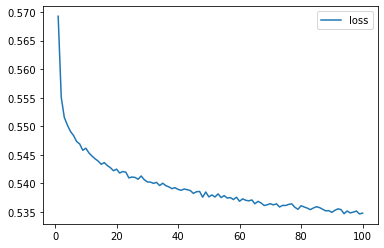

In [46]:
# Create a Dataframe using containing tarining history
history_df = pd.DataFrame(fit_model.history,index=range(1,len(fit_model.history["loss"])+1))

#plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

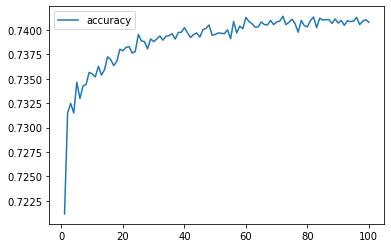

In [47]:
#plot the accuracy
history_df.plot(y="accuracy")

In [48]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5607 - accuracy: 0.7269 - 255ms/epoch - 952us/step
Loss: 0.5607160329818726, Accuracy: 0.7268804907798767


##### save the model

In [49]:
#Export our model to HDF5 file
nn.save("./Trained_Models/D3AlphabetSoupCharityOptimi1.h5")